In [0]:
!pip install PyGithub

     |████████████████████████████████| 266kB 5.0MB/s 


In [0]:
import pandas as pd
import numpy as np
from github import Github

In [0]:
yd_token = '0795d9d90b0a792c9d39e11510837511d8a9ecdb'
github_yd = Github(yd_token)
repo = github_yd.get_repo('twbs/bootstrap')
pull_requests = repo.get_pulls(state = 'closed')

print(pull_requests.totalCount)

10825


In [0]:
merged_requests = []
for req_idx in range(1000):
    if pull_requests[req_idx].merged:
        merged_requests.append(pull_requests[req_idx])
print(len(merged_requests))

776


In [0]:
reviews = []
for merged_request in merged_requests:
  reviews.append(merged_request.get_reviews())

In [0]:
smell_count = 0
for review in reviews:
  for single_review in review:
    if single_review.state != "APPROVE":
      smell_count += 1
      break
print(smell_count)

770


<BarContainer object of 2 artists>

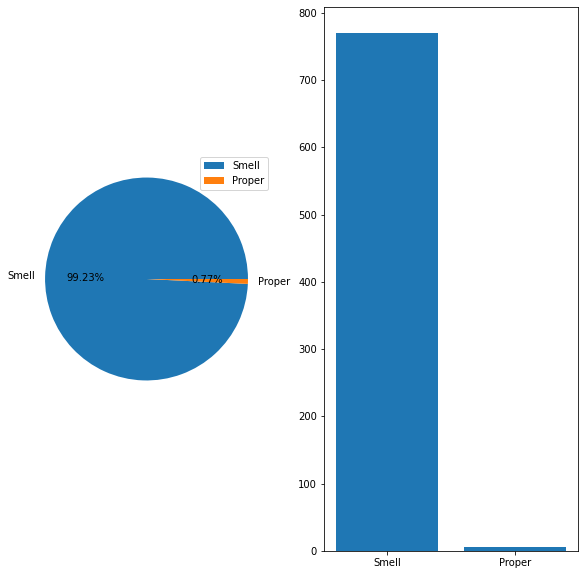

In [0]:
import matplotlib.pyplot as plt
smell_percentage = 100 * (smell_count / len(merged_requests))
data = [smell_percentage, 100 - smell_percentage]
label = ['Smell', 'Proper']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,10))
ax1.pie(data, labels = label, autopct = '%1.2f%%')
ax1.legend()
ax2.bar(label, [smell_count, len(merged_requests) - smell_count])